<a href="https://colab.research.google.com/github/Ayman947/Clustering-NYC-Toronto-Neighborhoods/blob/main/Cluster_NYC_Toronto_Neighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="left"><font size="10">NYC vs. Toronto</font></h1>

> In this notebook, we are going to approach a commonly faced problem by people who have to **move** from **NYC** to **Toronto** or Vice versa.

> The problem they face is that they have to move yet they prefer to move to a **similar place** to where they were, having the same **lifestyle**. (ex: similar places, similar venues, ...etc.)

> So, we are going to **cluster the neighborhoods** within the two cities according to their most common **venues**.

> Having clustered them, people will be able to **identify easily where to go** as simple as looking at the **clustered neighborhood map** which will have been generated.



## Importing The Necessary **Libraries**

In [2]:
# Numpy is for numerical calculations and array manipulations
import numpy as np
#np.set_printoptions(suppress=True, linewidth=100, precision=5)

# Pandas is for dataFrame Manipulation
import pandas as pd

# library to handle JSON files
import json

# importing web scraping packages
from bs4 import BeautifulSoup       
import requests 

# Essential Data Visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Essential Machine Learning packages
import sklearn
# importing packages
from sklearn.cluster import KMeans

# module to convert an address into latitude and longitude values
!pip install geopy
from geopy.geocoders import Nominatim 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# plotting library
# ! pip install folium==0.5.0
import folium

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Data** gathering

###### **NYC** from Json file 

In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [4]:
# assigning the file to a variable
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
# newyork_data

In [5]:
# getting relevant information
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

# instantiate the dataframe
neighborhoods_df = pd.DataFrame(columns=column_names)



# extracting relevant info from the json data to a dataframe
for data in neighborhoods_data:

    borough = data['properties']['borough']
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]


    neighborhoods_df = neighborhoods_df.append(
                                        
                                         {'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon},
                                         
                                           ignore_index=True)

# Viewng top rows
neighborhoods_df.shape
# neighborhoods_df.head()

(306, 4)

In [6]:
# Making a copy of NYC data
NYC_df = neighborhoods_df.copy()
NYC_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [7]:
# adding a column of NYC
NYC_df['City'] = 'NYC'
NYC_df.head()

,Borough,Neighborhood,Latitude,Longitude,City
0,Bronx,Wakefield,40.894705,-73.847201,NYC
1,Bronx,Co-op City,40.874294,-73.829939,NYC
2,Bronx,Eastchester,40.887556,-73.827806,NYC
3,Bronx,Fieldston,40.895437,-73.905643,NYC
4,Bronx,Riverdale,40.890834,-73.912585,NYC


###### **Web Scrapping Toronto**'s data

In [8]:
# Assigning the URL to a variable
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# Getting the contents of the webpage in text format and store in a variable called data
data = requests.get(url).text

# create a soup object using the variable 'data'
soup = BeautifulSoup(data,"html5lib")

# Getting the table using the soup object
table = soup.find('table')

In [9]:
# Scrapping the table cell by cell

table_contents=[]  # instantiating a list that gonna hold the dataframe rows

for row in table.findAll('td'):
    cell = {}      # instantiating a dictionary that gonna hold the row values as key:Value pairs
    
    if row.span.text=='Not assigned': # testing a condition to skip 'Not assigned' cells
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]    # getting only the 3 postal code characters
        cell['Borough'] = (row.span.text).split('(')[0] # getting the borough name
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ') # extracting the neighborhood name
        table_contents.append(cell)  # adding the dictionary to the table_content list

# table_contents       

In [10]:
# Creating a dataframe from the "table_content" list
Canada_df=pd.DataFrame(table_contents)
Canada_df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [11]:
# Check postal Codes Validity
Canada_df['PostalCode'].unique()

array(['M3A', 'M4A', 'M5A', 'M6A', 'M7A', 'M9A', 'M1B', 'M3B', 'M4B',
       'M5B', 'M6B', 'M9B', 'M1C', 'M3C', 'M4C', 'M5C', 'M6C', 'M9C',
       'M1E', 'M4E', 'M5E', 'M6E', 'M1G', 'M4G', 'M5G', 'M6G', 'M1H',
       'M2H', 'M3H', 'M4H', 'M5H', 'M6H', 'M1J', 'M2J', 'M3J', 'M4J',
       'M5J', 'M6J', 'M1K', 'M2K', 'M3K', 'M4K', 'M5K', 'M6K', 'M1L',
       'M2L', 'M3L', 'M4L', 'M5L', 'M6L', 'M9L', 'M1M', 'M2M', 'M3M',
       'M4M', 'M5M', 'M6M', 'M9M', 'M1N', 'M2N', 'M3N', 'M4N', 'M5N',
       'M6N', 'M9N', 'M1P', 'M2P', 'M4P', 'M5P', 'M6P', 'M9P', 'M1R',
       'M2R', 'M4R', 'M5R', 'M6R', 'M7R', 'M9R', 'M1S', 'M4S', 'M5S',
       'M6S', 'M1T', 'M4T', 'M5T', 'M1V', 'M4V', 'M5V', 'M8V', 'M9V',
       'M1W', 'M4W', 'M5W', 'M8W', 'M9W', 'M1X', 'M4X', 'M5X', 'M8X',
       'M4Y', 'M7Y', 'M8Y', 'M8Z'], dtype=object)

In [12]:
# Check neighborhoods Validity
Canada_df.Neighborhood.unique()

array(['Parkwoods', 'Victoria Village', 'Regent Park, Harbourfront',
       'Lawrence Manor, Lawrence Heights',
       'Ontario Provincial Government', 'Islington Avenue',
       'Malvern, Rouge', 'Don Mills North',
       'Parkview Hill, Woodbine Gardens', 'Garden District, Ryerson',
       'Glencairn',
       'West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale',
       'Rouge Hill, Port Union, Highland Creek', 'Don Mills South',
       'Woodbine Heights', 'St. James Town', 'Humewood-Cedarvale',
       'Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood',
       'Guildwood, Morningside, West Hill', 'The Beaches', 'Berczy Park',
       'Caledonia-Fairbanks', 'Woburn', 'Leaside', 'Central Bay Street',
       'Christie', 'Cedarbrae', 'Hillcrest Village',
       'Bathurst Manor, Wilson Heights, Downsview North',
       'Thorncliffe Park', 'Richmond, Adelaide, King',
       'Dufferin, Dovercourt Village', 'Scarborough Village',
       'Fairview, Henry Farm, O

In [13]:
# Check boroughs Validity
Canada_df.Borough.unique()

array(['North York', 'Downtown Toronto', "Queen's Park", 'Etobicoke',
       'Scarborough', 'East York', 'York', 'East Toronto', 'West Toronto',
       'East YorkEast Toronto', 'Central Toronto',
       'MississaugaCanada Post Gateway Processing Centre',
       'Downtown TorontoStn A PO Boxes25 The Esplanade',
       'EtobicokeNorthwest',
       'East TorontoBusiness reply mail Processing Centre969 Eastern'],
      dtype=object)

In [14]:
# Further data cleaning for Boroughs
Canada_df['Borough']=Canada_df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
# Canada_df.Borough.unique()

In [15]:
# Identifying the size of our data table
Canada_df.shape

(103, 3)

> Adding **Lats & Longs**

In [16]:
# importing geospatial data
geo_df = pd.read_csv('Geospatial_Coordinates.csv')
geo_df.columns = ['PostalCode', 'Latitude', 'Longitude']
geo_df.columns

Index(['PostalCode', 'Latitude', 'Longitude'], dtype='object')

In [17]:
# Adding Lats & Longs via merging
Canada_df = Canada_df.merge(geo_df, on='PostalCode')
Canada_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


> We are going to **filter only the Toronto's** Boroughs

In [18]:
Toronto_df = Canada_df[Canada_df['Borough'].str.contains("Toronto")]
Toronto_df.shape

(39, 5)

In [19]:
Toronto_df.index = np.arange(Toronto_df.shape[0])
Toronto_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


In [20]:
# adding a column of Toronto
Toronto_df['City'] = 'Toronto'
Toronto_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PostalCode,Borough,Neighborhood,Latitude,Longitude,City
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Toronto
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Toronto
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Toronto
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,Toronto
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,Toronto
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Toronto
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,Toronto
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,Toronto
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,Toronto
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106,Toronto


##### **Combining** NYC & Toronto

In [21]:
# combining only analysis-relevant columns
NYC_Toronto_df = pd.concat(  [ NYC_df.iloc[:,1:], Toronto_df.iloc[:,2:] ],
                                 ignore_index=True)

In [22]:
# testing that all rows have been concatenated sucessfully
(Toronto_df.shape[0] + NYC_df.shape[0]) == NYC_Toronto_df.shape[0]

True

In [23]:
# viewing results
# NYC_Toronto_df.head()
NYC_Toronto_df.shape

(345, 4)

In [24]:
# testing City
NYC_Toronto_df.City.unique()

array(['NYC', 'Toronto'], dtype=object)

##### **Visualizing** Neighborhoods of Toronto & NYC

> **Toronto**

In [25]:
# getting Toronto latitude & longitude
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'Latitude = {latitude}\nLongitude = {longitude}')

Latitude = 43.6534817
Longitude = -79.3839347


In [26]:
# generate map centred around the center of Toronto
Toronto_Neighborhoods_map = folium.Map(location= [latitude, longitude], zoom_start=11)

In [27]:
# adding neighborhoods as red circle markers
for lat, lng, label in zip( NYC_Toronto_df['Latitude'], NYC_Toronto_df['Longitude'], NYC_Toronto_df['Neighborhood'] ):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        # popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(Toronto_Neighborhoods_map)

In [28]:
# displaying the  map
Toronto_Neighborhoods_map.save("Neighborhoods-Of-Toronto.jpg")
Toronto_Neighborhoods_map

> **NYC**

In [29]:
# getting NYC latitude & longitude
address = 'NYC, USA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'Latitude = {latitude}\nLongitude = {longitude}')

Latitude = 40.7127281
Longitude = -74.0060152


In [30]:
# generate map centred around the center of NYC
NYC_Neighborhoods_map = folium.Map(location= [latitude, longitude], zoom_start=10)

In [31]:
# adding neighborhoods as red circle markers
for lat, lng, label in zip( NYC_Toronto_df['Latitude'], NYC_Toronto_df['Longitude'], NYC_Toronto_df['Neighborhood'] ):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        # popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(NYC_Neighborhoods_map)

In [32]:
# displaying the  map
NYC_Neighborhoods_map.save("Neighborhoods-Of-NYC.jpg")
NYC_Neighborhoods_map

##### **Fousquare API**

> A Foursquare is a location data provider.

> We're going to create an APIs to get data about the venues in NYC & Toronto.

In [33]:
## Foursquare Credentials
CLIENT_ID = 'DTLMVPY3NSNG04CXQLGFNCHDZV2N4IV5GR4D42B0T1U12BG3' # your Foursquare ID
CLIENT_SECRET = 'YZKV4KDTOTE1HZDSYXS2U5WEZF0KECVKEMWXCVJI3GJG42F3' # your Foursquare Secret
ACCESS_TOKEN = "43DUCE1QYLGHBQ5LHUBNGTJIATLXKCB3ROYEDG4IAX4CLXKV" # your FourSquare Access Token
VERSION = '20180604' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DTLMVPY3NSNG04CXQLGFNCHDZV2N4IV5GR4D42B0T1U12BG3
CLIENT_SECRET:YZKV4KDTOTE1HZDSYXS2U5WEZF0KECVKEMWXCVJI3GJG42F3


In [36]:
# creating a function that gets the near by venues data around given neighborhoods

def getNearbyVenues(city, names, latitudes, longitudes, radius=500, LIMIT = 100):
  ''' 
     The function takes in every neighborhood's  
                                                1)City
                                                2)Name
                                                3)Latitude 
                                                4)Longitude

     Then fetches the venues data that are within 500 m around the given location and with a limit of 100 venues
     
     Finally, it forms a dataframe consists of: 
                                                1) City Name
                                                2) Neighborhood Name
                                                3) Neighborhood Latitude
                                                4) Neighborhood Longitude
                                                5) Venue Name
                                                6) Venue Latitude
                                                7) Venue Longitude
                                                8) Venue Category   
  '''
  
  venues_list=[]
  for city, name, lat, lng in zip(city, names, latitudes, longitudes):
      print(name)

     # create the API request URL
      url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

      # make the GET request
      results = requests.get(url).json()["response"]['groups'][0]['items']

      # return only relevant information for each nearby venue
      venues_list.append([(
          city,
          name,
          lat,
          lng,
          v['venue']['name'],
          v['venue']['location']['lat'],
          v['venue']['location']['lng'],
          v['venue']['categories'][0]['name']) for v in results])

  nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
  nearby_venues.columns = [
                          'City',
                          'Neighborhood',
                          'Neighborhood Latitude',
                          'Neighborhood Longitude',
                          'Venue',
                          'Venue Latitude',
                          'Venue Longitude',
                          'Venue Category']

  return(nearby_venues)

In [37]:
# calling the function
NYC_Toronto_Venues = getNearbyVenues(NYC_Toronto_df.City, NYC_Toronto_df.Neighborhood, NYC_Toronto_df.Latitude, NYC_Toronto_df.Longitude)
NYC_Toronto_Venues.head()

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,NYC,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,NYC,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
2,NYC,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,NYC,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant,40.898083,-73.850259,Caribbean Restaurant
4,NYC,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,Sandwich Place


In [38]:
# getting the shape
print(NYC_Toronto_Venues.shape)

(10965, 8)


In [39]:
# getting the no.of venues corresponding to each neighborhood
NYC_Toronto_Venues.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False)

Neighborhood
Murray Hill                                                                                                   133
Chelsea                                                                                                       105
Financial District                                                                                            100
Flatiron                                                                                                      100
Chinatown                                                                                                     100
Clinton                                                                                                       100
Commerce Court, Victoria Hotel                                                                                100
East Village                                                                                                  100
South Side                                                                 

In [40]:
# getting the no. of unique venue categories
print('There are {} uniques categories.'.format(NYC_Toronto_Venues['Venue Category'].nunique()))

There are 455 uniques categories.


## Data **Cleansning** & **Preprocessing**


> The data set includes details about Toronto's neighborhoods and their respective venues. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| City            | Neighborhood's city|
| Neighborhood    | Neighborhood name                                           |
| Neighborhood Latitude      | Latitude of the neighborhood's center                         |
| Neighborhood Longitude	          | Longitude of the neighborhood's center |
| Venue | Venue name |
| Venue Latitude | Latitude at the center of the Venue |
| Venue Longitude | Longitude at the center of the venue |
|Venue Category | The venue type or category ex: Italian Restaurant.|


### Checking for nulls for **completeness**.

In [42]:
# Detecting null values in our dataset:
NYC_Toronto_Venues.isnull().sum()

City                      0
Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
Venue Category            0
dtype: int64

> There are no missing values in our data.

### Removing Duplicates for **uniqueness**.

In [43]:
# Getting duplicates' count in our dataset:
NYC_Toronto_Venues.duplicated().value_counts()

False    10965
dtype: int64

> There are no duplicates in our data.

### **One Hot Encoding**

In [44]:
NYC_Toronto_Venues.shape

(10965, 8)

In [46]:
# getting the no. of unique venue categories
print('There are {} uniques categories.'.format(NYC_Toronto_Venues['Venue Category'].nunique()))

There are 455 uniques categories.


In [45]:
# one hot encoding
NYC_Toronto_Onehot = pd.get_dummies(NYC_Toronto_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NYC_Toronto_Onehot['Neighborhood'] = NYC_Toronto_Venues['Neighborhood']

# NYC_Toronto_Onehot.head(5)
NYC_Toronto_Onehot.shape

(10965, 455)

In [50]:
# NYC_Toronto_Onehot.head()

### **Exporting**

In [52]:
NYC_Toronto_Venues.to_csv('NYC_Toronto_Venues.csv' , index = False)

## Exploratory **EDA**

> Creating a dataframe showing the venue's **apearance frequency** corresponding to every neighborhood.

In [242]:
# Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category
NYC_Toronto_Grouped = NYC_Toronto_Onehot.groupby('Neighborhood').mean()
# NYC_Toronto_Grouped.head()
NYC_Toronto_Grouped.to_csv('NYC-Toronto-Onehot.csv', index=True)
NYC_Toronto_Grouped.shape

(339, 454)

>Creating a new dataframe that displays the **top n** venues for each neighborhood

In [57]:
# assingning the no. of top venues
num_top_venues = 10


# creating the column names
indicators = ['st', 'nd', 'rd']
columns = []
for i in np.arange(num_top_venues):
  try:
    columns.append(f'{i+1}{indicator[i]} Most Common Venue')
  except:
    columns.append(f'{i+1}th Most Common Venues')
# columns    


# Creating a new dataframe
NYC_Toronto_neighborhoods_venues_sorted = pd.DataFrame(columns = columns, index = NYC_Toronto_Grouped.index )
# NYC_Toronto_neighborhoods_venues_sorted.shape



# Generating rows
for hood in NYC_Toronto_Grouped.index.values:
  NYC_Toronto_neighborhoods_venues_sorted.loc[hood] = NYC_Toronto_Grouped.loc[hood].sort_values(ascending = False).index.values[0:num_top_venues]

# viewing
NYC_Toronto_neighborhoods_venues_sorted.head(5)

,1th Most Common Venues,2th Most Common Venues,3th Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
Neighborhood,,,,,,,,,,
Allerton,Pizza Place,Deli / Bodega,Bakery,Chinese Restaurant,Supermarket,Discount Store,Electronics Store,Spa,Pharmacy,Donut Shop
Annadale,Pizza Place,Pharmacy,Restaurant,Diner,American Restaurant,Liquor Store,Dance Studio,Sushi Restaurant,Ethiopian Restaurant,Event Service
Arden Heights,Pharmacy,Coffee Shop,Pizza Place,Bus Stop,Fast Food Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space
Arlington,American Restaurant,Bus Stop,Intersection,Deli / Bodega,Boat or Ferry,Coffee Shop,Yoga Studio,Field,Fast Food Restaurant,Farmers Market
Arrochar,Italian Restaurant,Pizza Place,Bus Stop,Sandwich Place,Athletics & Sports,Middle Eastern Restaurant,Liquor Store,Hotel,Outdoors & Recreation,Food Truck


In [64]:
# Test
NYC_Toronto_Grouped.loc['Annadale'].sort_values(ascending=False).head(10)

Pizza Place             0.222222
Pharmacy                0.111111
Restaurant              0.111111
Diner                   0.111111
American Restaurant     0.111111
Liquor Store            0.111111
Dance Studio            0.111111
Sushi Restaurant        0.111111
Ethiopian Restaurant    0.000000
Event Service           0.000000
Name: Annadale, dtype: float64

## **K-Means** Clustering

 >  We are going to apply a **partitioning** **unsupervised** clustering ML model by which we cluster a given set of observations, neighborhoods in our model, according to their features, respective venues appearence likelihood in our model, into **non-overlaping** clusters without any **internal structure**.

### Clustering **Features**

In [65]:
x_scaled = NYC_Toronto_Grouped
x_scaled.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan R

### **Modeling**

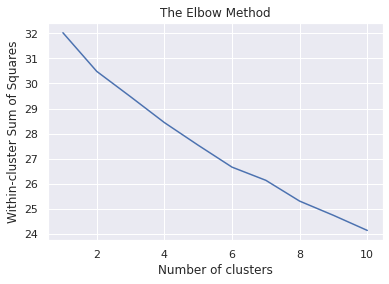

In [66]:
# calculating the within clusters sum of squares for different values of centroids (aka: K)
wcss=[]
for k in range(1,11):
    kmeans = KMeans(k, init='k-means++')
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

# Plotting
number_clusters = range(1,11)
plt.plot(number_clusters,wcss);
plt.title('The Elbow Method');
plt.xlabel('Number of clusters');
plt.ylabel('Within-cluster Sum of Squares');
plt.savefig('WCSS.png')

In [67]:
no_clusters = 6

# fitting the model with the optimal no of clusters that:
kmeans = KMeans(no_clusters, init='k-means++', random_state=0)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### **Interpretations & Insights**

#### **Clusters Breakdown**

In [228]:
# creating a dataframe with the clusters identified
identified_clusters = kmeans.fit_predict(x_scaled)
NYC_Toronto_Venues_Clustered = NYC_Toronto_neighborhoods_venues_sorted.copy()
NYC_Toronto_Venues_Clustered['Cluster'] = identified_clusters
NYC_Toronto_Venues_Clustered.reset_index(inplace=True)
NYC_Toronto_Venues_Clustered.head(5)

,Neighborhood,1th Most Common Venues,2th Most Common Venues,3th Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues,Cluster
0,Allerton,Pizza Place,Deli / Bodega,Bakery,Chinese Restaurant,Supermarket,Discount Store,Electronics Store,Spa,Pharmacy,Donut Shop,5
1,Annadale,Pizza Place,Pharmacy,Restaurant,Diner,American Restaurant,Liquor Store,Dance Studio,Sushi Restaurant,Ethiopian Restaurant,Event Service,5
2,Arden Heights,Pharmacy,Coffee Shop,Pizza Place,Bus Stop,Fast Food Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,4
3,Arlington,American Restaurant,Bus Stop,Intersection,Deli / Bodega,Boat or Ferry,Coffee Shop,Yoga Studio,Field,Fast Food Restaurant,Farmers Market,4
4,Arrochar,Italian Restaurant,Pizza Place,Bus Stop,Sandwich Place,Athletics & Sports,Middle Eastern Restaurant,Liquor Store,Hotel,Outdoors & Recreation,Food Truck,5


In [229]:
# Creating a dataframe that contains Toronto's & NYC's neighborhoods clustered on their respective 10 popular venues
NYC_Toronto_Clustered = NYC_Toronto_df.merge(NYC_Toronto_Venues_Clustered, on='Neighborhood')
NYC_Toronto_Clustered.sort_values(by='Cluster', inplace=True)
NYC_Toronto_Clustered.head()

,Neighborhood,Latitude,Longitude,City,1th Most Common Venues,2th Most Common Venues,3th Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues,Cluster
162,Briarwood,40.710935,-73.811748,NYC,Playground,Coffee Shop,Plaza,Deli / Bodega,Bus Station,Convenience Store,Indian Restaurant,Arts & Crafts Store,Fast Food Restaurant,Farmers Market,0
216,Oakwood,40.558462,-74.121566,NYC,Nightlife Spot,Bar,Bus Station,Lawyer,Playground,Fast Food Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,0
303,Bayswater,40.611322,-73.765968,NYC,Playground,Yoga Studio,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,0
4,Riverdale,40.890834,-73.912585,NYC,Bus Station,Plaza,Bank,Park,Gym,Playground,Yoga Studio,Escape Room,Ethiopian Restaurant,Event Service,0
29,Country Club,40.844246,-73.824099,NYC,Playground,Chinese Restaurant,Trail,Athletics & Sports,Moving Target,Sandwich Place,Ethiopian Restaurant,Escape Room,Farmers Market,Event Space,0


In [230]:
# exporting the clustered neighborhoods into a csv file
NYC_Toronto_Clustered.to_csv('NYC-Toronto-Clustered.csv', index = False)

##### **Toronto**

In [231]:
# Getting cluster numbers and their corresponding size and % of total

# Filtering Toronto
temp_Toronto_df = NYC_Toronto_Clustered[NYC_Toronto_Clustered['City'] == 'Toronto']

# Getting clusters' volume
cluster_size_Toronto = pd.DataFrame(temp_Toronto_df[('Cluster')].value_counts())

# Renaming the column
cluster_size_Toronto.columns = ['Toronto_Cluster_Volume']

# Adding a column for %
cluster_size_Toronto['Toronto_Cluster_%'] = round(((cluster_size_Toronto['Toronto_Cluster_Volume'] / cluster_size_Toronto['Toronto_Cluster_Volume'].sum())*100), 2)
cluster_size_Toronto['Toronto_Cluster_%'] = cluster_size_Toronto['Toronto_Cluster_%'].astype('string') + "%"

# Sorting the table according to the cluster volume in a descending order
cluster_size_Toronto.sort_values(by='Toronto_Cluster_Volume', ascending=False, inplace=True)

# Modifying the cluster indexing to be more user-friendly 
cluster_size_Toronto.index = cluster_size_Toronto.index+1

# Assigning the index name
cluster_size_Toronto.index.name = 'Cluster_no'

# Exporting & Viewing the table
cluster_size_Toronto.to_csv('cluster-size-Toronto.csv', index=True)
cluster_size_Toronto

,Toronto_Cluster_Volume,Toronto_Cluster_%
Cluster_no,,
3,35,89.74%
4,2,5.13%
6,1,2.56%
1,1,2.56%


##### **NYC**

In [232]:
# Getting cluster numbers and their corresponding size and % of total

# Filtering NYC
temp_NYC_df = NYC_Toronto_Clustered[NYC_Toronto_Clustered['City'] == 'NYC']

# Getting clusters' volume
cluster_size_NYC = pd.DataFrame(temp_NYC_df[('Cluster')].value_counts())

# Renaming the column
cluster_size_NYC.columns = ['NYC_Cluster_Volume']

# Adding a column for %
cluster_size_NYC['NYC_Cluster_%'] = round(((cluster_size_NYC['NYC_Cluster_Volume'] / cluster_size_NYC['NYC_Cluster_Volume'].sum())*100), 2)
cluster_size_NYC['NYC_Cluster_%'] = cluster_size_NYC['NYC_Cluster_%'].astype('string') + "%"

# Sorting the table according to the cluster volume in a descending order
cluster_size_NYC.sort_values(by='NYC_Cluster_Volume', ascending=False, inplace=True)

# Modifying the cluster indexing to be more user-friendly 
cluster_size_NYC.index = cluster_size_NYC.index+1

# Assigning the index name
cluster_size_NYC.index.name = 'Cluster_no'

# Exporting & Viewing the table
cluster_size_NYC.to_csv('cluster-size-NYC.csv', index=True)
cluster_size_NYC

,NYC_Cluster_Volume,NYC_Cluster_%
Cluster_no,,
6,166,54.43%
3,106,34.75%
5,21,6.89%
1,8,2.62%
4,3,0.98%
2,1,0.33%


##### **Toronto** & **NYC**

In [233]:
Cluster_Breakdown = cluster_size_NYC.join(cluster_size_Toronto, on='Cluster_no')
Cluster_Breakdown.sort_index(inplace=True)
Cluster_Breakdown['Toronto_Cluster_Volume'].replace(np.nan, '-', inplace=True)
Cluster_Breakdown['Toronto_Cluster_%'].replace(np.nan, '-', inplace=True)
Cluster_Breakdown.to_csv('cluster-size-all.csv', index=True)
Cluster_Breakdown

,NYC_Cluster_Volume,NYC_Cluster_%,Toronto_Cluster_Volume,Toronto_Cluster_%
Cluster_no,,,,
1,8,2.62%,1,2.56%
2,1,0.33%,-,-
3,106,34.75%,35,89.74%
4,3,0.98%,2,5.13%
5,21,6.89%,-,-
6,166,54.43%,1,2.56%



> The vast majority of NYC's neighborhoods fall in the 6th & 3rd clusters.

> The vast majority of Toronto's neighborhoods fall in the 3rd cluster which we gonna describe very soon.

> In Toronto, there are no neighborhoods fall into neither the 2nd nor the 5th clusters.

> (i.e If someone is living in either the 2nd or the 5th clusters in NYC, won't find a similar neighborhood to move to in Toronto.)

#### **Clustered Map**

##### **Toronto Clustered**

In [234]:
# getting Toronto latitude & longitude
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_Toronto = location.latitude
longitude_Toronto = location.longitude
print(f'Latitude of Toronto  =  {latitude}\nLongitude of Toronto = {longitude}')

Latitude of Toronto  =  43.6534817
Longitude of Toronto = -79.3839347


In [235]:
# creating a map centered around Toronto
Toronto_map_clusters = folium.Map(location=[latitude_Toronto, longitude_Toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(no_clusters)
ys = [i + x + (i*x)**2 for i in range(no_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_Toronto_Clustered['Latitude'], NYC_Toronto_Clustered['Longitude'], NYC_Toronto_Clustered['Neighborhood'], NYC_Toronto_Clustered['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Toronto_map_clusters)

Toronto_map_clusters.save("Clustered-Neighborhoods-Of-Toronto.jpg")       
Toronto_map_clusters


##### **NYC Clustered**

In [236]:
# getting NYC latitude & longitude
address = 'NYC, USA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_NYC = location.latitude
longitude_NYC = location.longitude
print(f'Latitude of NYC  =  {latitude}\nLongitude of NYC = {longitude}')

Latitude of NYC  =  43.6534817
Longitude of NYC = -79.3839347


In [237]:
# creating a map centered around NYC
NYC_map_clusters = folium.Map(location=[latitude_NYC, longitude_NYC], zoom_start=11)

# set color scheme for the clusters
x = np.arange(no_clusters)
ys = [i + x + (i*x)**2 for i in range(no_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_Toronto_Clustered['Latitude'], NYC_Toronto_Clustered['Longitude'], NYC_Toronto_Clustered['Neighborhood'], NYC_Toronto_Clustered['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(NYC_map_clusters)

NYC_map_clusters.save("Clustered-Neighborhoods-Of-NYC.jpg")       
NYC_map_clusters



> Referencing the maps above:
 - We can identify our neighborhood and its cluster as well by just clicking on it.
 - we will be able to determine which neighborhoods are simiar or where to go (i.e by their colors) either in NYC or Toronto.


#### **Clusters Venues**

In [239]:
# Printing the most common venues in each cluster

NYC_Toronto_Venues_Clustered.sort_values(by='Cluster', inplace=True)

# Looping over clusters
for cluster in NYC_Toronto_Venues_Clustered['Cluster'].unique():

  temp_cluster_df = NYC_Toronto_Venues_Clustered[NYC_Toronto_Venues_Clustered['Cluster']==cluster].iloc[:,column_indices[1:11]]  # filtering the data by cluster temporarily
  temp_Cluster_venues = []  # instantiate an empty list temporarily 

  # Looping over rows
  for row in range(temp_cluster_df.shape[0]):
    # Looping over columns
    for col in range(temp_cluster_df.shape[1]):
      # appending the venue category if it hasn't appended for the cluster where we are
      if (temp_cluster_df.iloc[row,col] not in temp_Cluster_venues):
        temp_Cluster_venues.append(temp_cluster_df.iloc[row,col])
  
  # Printting cluster No. and its respective most common venues
  print(f'In Cluster({cluster+1}), you may go to :')
  print(f'{temp_Cluster_venues}\n\n')   
  

In Cluster(1), you may go to :
['Playground', 'Supermarket', 'Halal Restaurant', 'Bar', 'Park', 'Pizza Place', 'Bakery', 'Japanese Restaurant', 'Bowling Alley', 'Farm', 'Bus Station', 'Yoga Studio', 'Filipino Restaurant', 'Ethiopian Restaurant', 'Event Service', 'Event Space', 'Exhibit', 'Factory', 'Falafel Restaurant', 'Nightlife Spot', 'Lawyer', 'Fast Food Restaurant', 'Escape Room', 'Chinese Restaurant', 'Trail', 'Athletics & Sports', 'Moving Target', 'Sandwich Place', 'Farmers Market', 'Coffee Shop', 'Plaza', 'Deli / Bodega', 'Convenience Store', 'Indian Restaurant', 'Arts & Crafts Store', 'Bagel Shop', 'Burger Joint', 'Field', 'Electronics Store', 'English Restaurant', 'Bank', 'Gym', 'Tennis Court']


In Cluster(2), you may go to :
['Dog Run', 'Yoga Studio', 'Empanada Restaurant', 'Escape Room', 'Ethiopian Restaurant', 'Event Service', 'Event Space', 'Exhibit', 'Factory', 'Falafel Restaurant']


In Cluster(3), you may go to :
['Coffee Shop', 'Italian Restaurant', 'Café', 'Cocktail

In [240]:
# Exploring neighborhoodwise venues by clusters
CN = int(input('Please, input the number of the cluster you wanna explore:\n>>> ' ))-1
column_indices = list(range(11))
NYC_Toronto_Venues_Clustered[NYC_Toronto_Venues_Clustered['Cluster'] == CN].iloc[:,column_indices].set_index('Neighborhood')

Please, input the number of the cluster you wanna explore:
>>> 4


,1th Most Common Venues,2th Most Common Venues,3th Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
Neighborhood,,,,,,,,,,
The Danforth East,Convenience Store,Park,Yoga Studio,Field,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit
Lawrence Park,Business Service,Swim School,Park,Bus Line,Yoga Studio,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory
Clason Point,Park,Pool,Playground,Grocery Store,Convenience Store,Boat or Ferry,Bus Stop,Scenic Lookout,South American Restaurant,Yoga Studio
Somerville,Park,Yoga Studio,Fried Chicken Joint,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory
Todt Hill,Trail,Park,Yoga Studio,Fast Food Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit
